## OECD Term Matching

#### Author: Cierra Oliveira

#### Date: 6/21/2021

#### Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import gensim
import time
import seaborn as sns

/home/dab3dj/.conda/envs/CO_BERT/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import collections
from wordcloud import WordCloud

In [203]:
#df = pd.read_pickle("/home/dab3dj/git/dspg21RnD/data/dspg21RnD/smaller-final-dataset.pkl")
df = pd.read_pickle("/home/dab3dj/git/dspg21RnD/data/dspg21RnD/smaller-final-dataset2.pkl")
df.reset_index(inplace = True)

#### Reading in already matched abstracts and gettings stats

In [ ]:
ai = pd.read_csv("/home/dab3dj/git/dspg21RnD/data/dspg21RnD/term_matched_abstracts_final.csv")


In [78]:
ai_years = ai['PROJECT_START_DATE']

In [79]:
from datetime import datetime

In [80]:
ai_years = pd.to_datetime(ai_years)

In [81]:
ai['PROJECT_START_YEAR'] = ai_years.dt.year

<ipython-input-81-e667ede10a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai['PROJECT_START_YEAR'] = ai_years.dt.year


In [82]:
import seaborn as sb

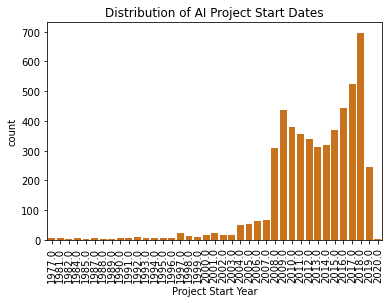

In [84]:
fig, ax = plt.subplots()
ax = sb.countplot(x=ai['PROJECT_START_YEAR'],
                 color='#E57200')
plt.title("Distribution of AI Project Start Dates")
ax.set(xlabel="Project Start Year")
plt.xticks(rotation=90)
plt.show()

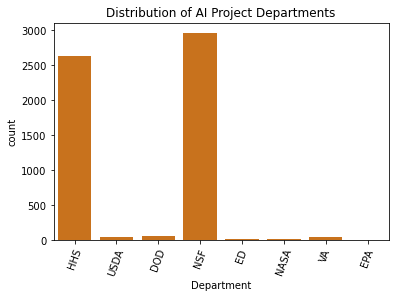

In [85]:
fig, ax = plt.subplots()
ax = sb.countplot(x=ai['DEPARTMENT'],
                 color='#E57200')
plt.title("Distribution of AI Project Departments")
ax.set(xlabel="Department")
plt.xticks(rotation=70)
plt.show()

#### Creating core and non-core query words
##### Source: OECD Selected list of AI key term

In [10]:
core_n_terms = ["artificial intelligence","artificial neural network","back propagation"
,"back propagation neural network","computational intelligence","computer vision"
,"convolutional neural network","deep belief network","deep convolutional neural network"
,"deep learn","deep neural network","elman network","elman neural network"
,"expert system","fee forward neural network","inference engine","machine intelligence"
,"machine learn","machine translation","machine vision","multilayer neural network"
,"natural language process","random forest","rbf neural network","recurrent neural network"
,"self organize map","spike neural network","supervise learn","support vector machine"
,"svm classifier","unsupervised learn"]

In [11]:
core_single_terms = ["adaboost","perceptron","artificial_intelligence","artificial_neural_network","back_propagation"
,"back_propagation_neural_network","computational_intelligence","computer_vision"
,"convolutional_neural_network","deep_belief_network","deep_convolutional_neural_network"
,"deep_learn","deep_neural_network","elman_network","elman_neural_network"
,"expert_system","fee_forward_neural_network","inference_engine","machine_intelligence"
,"machine_learn","machine_translation","machine_vision","multilayer_neural_network"
,"natural_language_process","random_forest","rbf_neural_network","recurrent_neural_network"
,"self_organize_map","spike_neural_network","supervise_learn","support_vector_machine"
,"svm_classifier","unsupervised_learn"]

In [12]:
# core_terms = ["artificial intelligence","artificial neural network","back propagation"
# ,"back propagation neural network","computational intelligence","computer vision"
# ,"convolutional neural network","deep belief network","deep convolutional neural network"
# ,"deep learn","deep neural network","elman network","elman neural network"
# ,"expert system","fee forward neural network","inference engine","machine intelligence"
# ,"machine learn","machine translation","machine vision","multilayer neural network"
# ,"natural language process","random forest","rbf neural network","recurrent neural network"
# ,"self organize map","spike neural network","supervise learn","support vector machine"
# ,"svm classifier","unsupervised learn","adaboost","perceptron","artificial_intelligence","artificial_neural_network","back_propagation"
# ,"back_propagation_neural_network","computational_intelligence","computer_vision"
# ,"convolutional_neural_network","deep_belief_network","deep_convolutional_neural_network"
# ,"deep_learn","deep_neural_network","elman_network","elman_neural_network"
# ,"expert_system","fee_forward_neural_network","inference_engine","machine_intelligence"
# ,"machine_learn","machine_translation","machine_vision","multilayer_neural_network"
# ,"natural_language_process","random_forest","rbf_neural_network","recurrent_neural_network"
# ,"self_organize_map","spike_neural_network","supervise_learn","support_vector_machine"
# ,"svm_classifier","unsupervised_learn"]

In [13]:
noncore_single_terms = ["bioinformatics", "humanoid", "robot", "sarsa","actor_critic", "analog_vlsi", "associative_memory", "autonomous_vehicle", "bayes_classifer",
"bayesian_belief_network", "camera_calibration", "collaborative_system",
"commonsense_reason", "computational_biology", "datum_mine", "decision_tree", "description_logic",
"dimensionality_reduction", "discriminant_analysis", "fuzzy_logic", "gene_ontology", "hide_markov_model",
"image_alignment", "image_match", "information_retrieval", "kegg_pathway", "knowledge_base", 
"knowledge_representation_and_reason", "linear_discriminant", "markov_decision_process",
"mulitclass_classification", "naive_bayes", "name_entity_recognition", "near_neighbor_classifier", 
"neural_network", "neuro_fuzzy", "neuromorphic_compute", "neuromorphic_hardware", "nonrigid_registration", 
"nonmonotonic_reason", "object_recognition", "opinion_mine", "optimal_search", "pattern_analysis", 
"pattern_recognition", "person_reidentification", "principal_component_analysis", "question_answer", "radial_basis_function",
"rbf_kernel", "reinforcement_learn", "rigid_registration", "sensor_datum_fusion", 
"sensor_network", "speech_recognition", "stereo_match", "symbolic_reason", "system_and_control_theory",
"template_match", "text_categorization", "text_mine", "text_summarization", "word_sense_disambiguation"]

In [14]:
noncore_n_terms = ["actor critic", "analog vlsi", "associative memory", "autonomous vehicle", "bayes classifer",
"bayesian belief network", "camera calibration", "collaborative system",
"commonsense reason", "computational biology", "datum mine", "decision tree", "description logic",
"dimensionality reduction", "discriminant analysis", "fuzzy logic", "gene ontology", "hide markov model",
"image alignment", "image match", "information retrieval", "kegg pathway", "knowledge base", 
"knowledge representation and reason", "linear discriminant", "markov decision process",
"mulitclass classification", "naive bayes", "name entity recognition", "near neighbor classifier", 
"neural network", "neuro fuzzy", "neuromorphic compute", "neuromorphic hardware", "non rigid registration", 
"nonmonotonic reason", "object recognition", "opinion mine", "optimal search", "pattern analysis", 
"pattern recognition", "person re identification", "principal component analysis", "question answer", "radial basis function",
"rbf kernel", "reinforcement learn", "rigid registration", "sensor datum fusion", 
"sensor network", "speech recognition", "stereo match", "symbolic reason", "system and control theory",
"template match", "text categorization", "text mine", "text summarization", "word sense disambiguation",
]

In [15]:
# noncore_terms = ["bioinformatics", "humanoid", "robot", "sarsa","actor_critic", "analog_vlsi", "associative_memory", "autonomous_vehicle", "bayes_classifer",
# "bayesian_belief_network", "camera_calibration", "collaborative_system",
# "commonsense_reason", "computational_biology", "datum_mine", "decision_tree", "description_logic",
# "dimensionality_reduction", "discriminant_analysis", "fuzzy_logic", "gene_ontology", "hide_markov_model",
# "image_alignment", "image_match", "information_retrieval", "kegg_pathway", "knowledge_base", 
# "knowledge_representation_and_reason", "linear_discriminant", "markov_decision_process",
# "mulitclass_classification", "naive_bayes", "name_entity_recognition", "near_neighbor_classifier", 
# "neural_network", "neuro_fuzzy", "neuromorphic_compute", "neuromorphic_hardware", "nonrigid_registration", 
# "nonmonotonic_reason", "object_recognition", "opinion_mine", "optimal_search", "pattern_analysis", 
# "pattern_recognition", "person_reidentification", "principal_component_analysis", "question_answer", "radial_basis_function",
# "rbf_kernel", "reinforcement_learn", "rigid_registration", "sensor_datum_fusion", 
# "sensor_network", "speech_recognition", "stereo_match", "symbolic_reason", "system_and_control_theory",
# "template_match", "text_categorization", "text_mine", "text_summarization", "word_sense_disambiguation", 
# "actor critic", "analog vlsi", "associative memory", "autonomous vehicle", "bayes classifer",
# "bayesian belief network", "camera calibration", "collaborative system",
# "commonsense reason", "computational biology", "datum mine", "decision tree", "description logic",
# "dimensionality reduction", "discriminant analysis", "fuzzy logic", "gene ontology", "hide markov model",
# "image alignment", "image match", "information retrieval", "kegg pathway", "knowledge base", 
# "knowledge representation and reason", "linear discriminant", "markov decision process",
# "mulitclass classification", "naive bayes", "name entity recognition", "near neighbor classifier", 
# "neural network", "neuro fuzzy", "neuromorphic compute", "neuromorphic hardware", "non rigid registration", 
# "nonmonotonic reason", "object recognition", "opinion mine", "optimal search", "pattern analysis", 
# "pattern recognition", "person re identification", "principal component analysis", "question answer", "radial basis function",
# "rbf kernel", "reinforcement learn", "rigid registration", "sensor datum fusion", 
# "sensor network", "speech recognition", "stereo match", "symbolic reason", "system and control theory",
# "template match", "text categorization", "text mine", "text summarization", "word sense disambiguation",
# ]

#### Classifying 

In [16]:
def term_match(list):
    matched_words = []
    core_count = 0
    noncore_count =0
    for word in list:
        if (word in core_single_terms and word not in matched_words):
            core_count+=1
            matched_words.append(word)
        if (word in noncore_single_terms and word not in matched_words):
            noncore_count+=1
            matched_words.append(word)
    if (core_count >= 1 or noncore_count >= 2):
        return matched_words
    else:
        #return False
        return []
        

In [207]:
def term_match_final(list):
    matched_idx = []
    matched_words = []
    core_count = 0
    noncore_count =0
    
    # single term matching
    for word in list:
        if (word in core_single_terms and word not in matched_words):
            core_count+=1
            matched_words.append(word)
        if (word in noncore_single_terms and word not in matched_words):
            noncore_count+=1
            matched_words.append(word)
    
    
    # ngram term matching
    # check core terms
    for term in core_n_terms:
        # empty matched word lists before going to next term
        matched_idx = []
        
        if (all(x in list for x in term.split())):
            # for every word in core terms
            for word in term.split():
                # save the index of the token that matches the core term
                matched_idx.append([i for i, element in enumerate(list) if element == word])
                
            # see if the indices <= 2 words apart
            for i in matched_idx[0]:
                for j in matched_idx[1]:
                    if (len(matched_idx) > 2):
                        for k in matched_idx[2]:
                            # are indicies <=2 and is word not already in list
                            if((k - j)<=2 and (j - i)<=2 and
                              (k - j)>0 and (j - i)>0):
                                # if so, increase count and append word
                                core_count += 1
                                if list[i] not in matched_words:
                                    matched_words.append(list[i])
                                if list[j] not in matched_words:
                                    matched_words.append(list[j])
                                if list[k] not in matched_words:
                                    matched_words.append(list[k])
                                
                    else:
                        # are indicies <=2 and is word not already in list
                        if((j - i)<=2 and (j - i)>0):
                            # if so, increase count and append word
                            core_count += 1
                            if list[i] not in matched_words:
                                matched_words.append(list[i])
                            if list[j] not in matched_words:
                                matched_words.append(list[j])
                    
    # check noncore terms                  
    for term in noncore_n_terms:
        # empty matched word list before going to next term
        matched_idx = []
        
        if (all(x in list for x in term.split())):
            for word in term.split():
                matched_idx.append([i for i, element in enumerate(list) if element == word])

            # see if the indices <= 2 words apart
            for i in matched_idx[0]:
                for j in matched_idx[1]:
                    if (len(matched_idx) > 2):
                        for k in matched_idx[2]:
                            if((k - j)<=2 and (j - i)<=2 and
                              (k - j)>0 and (j - i)>0):
                                noncore_count += 1
                                if list[i] not in matched_words:
                                    matched_words.append(list[i])
                                if list[j] not in matched_words:
                                    matched_words.append(list[j])
                                if list[k] not in matched_words:
                                    matched_words.append(list[k])
                                
                    else:
                        if((j - i)<=2 and (j - i)>0):
                            noncore_count += 1
                            if list[i] not in matched_words:
                                    matched_words.append(list[i])
                            if list[j] not in matched_words:
                                    matched_words.append(list[j])
                            
                            
    
    
    if (core_count >= 1 or noncore_count >= 2):
        return matched_words
    else:
        #return False
        return []

In [166]:
# def term_match_nterms(list):
#     matched_idx = []
#     matched_words = []
#     core_count = 0
#     noncore_count =0
    
#     # check core terms
#     for term in core_n_terms:
#         # empty matched word lists before going to next term
#         matched_idx = []
        
#         if (all(x in list for x in term.split())):
#             # for every word in core terms
#             for word in term.split():
#                 # save the index and string of the token that matches the core term
#                 matched_idx.append([i for i, element in enumerate(list) if element == word])
                
                

#             # see if the indices <= 2 words apart
#             for i in matched_idx[0]:
#                 for j in matched_idx[1]:
#                     if (len(matched_idx) > 2):
#                         for k in matched_idx[2]:
#                             print(matched_words, matched_idx)
#                             if((k - j)<=2 and (j - i)<=2 and
#                               (k - j)>0 and (j - i)>0):
#                                 core_count += 1
#                                 matched_words.append(list[i])
#                                 matched_words.append(list[j])
#                                 matched_words.append(list[k])
                                
#                     else:
#                         if((j - i)<=2 and (j - i)>0):
#                             core_count += 1
#                             matched_words.append(list[i])
#                             matched_words.append(list[j])
        
#     # check noncore terms                  
#     for term in noncore_n_terms:
#         # empty matched word list before going to next term
#         matched_idx = []
        
#         if (all(x in list for x in term.split())):
#             for word in term.split():
#                 matched_idx.append([i for i, element in enumerate(list) if element == word])

#             # see if the indices <= 2 words apart
#             for i in matched_idx[0]:
#                 for j in matched_idx[1]:
#                     if (len(matched_idx) > 2):
#                         for k in matched_idx[2]:
#                             if((k - j)<=2 and (j - i)<=2 and
#                               (k - j)>0 and (j - i)>0 and 
#                               (list[i] not in matched_words and 
#                                list[j] not in matched_words and
#                                list[k] not in matched_words)):
#                                 noncore_count += 1
#                                 matched_words.append(list[i])
#                                 matched_words.append(list[j])
#                                 matched_words.append(list[k])
                                
#                     else:
#                         if((j - i)<=2 and (j - i)>0 and 
#                            (list[i] not in matched_words and 
#                            list[j] not in matched_words)):
#                             noncore_count += 1
#                             matched_words.append(list[i])
#                             matched_words.append(list[j])
#     print(matched_words)                   
#     if (core_count >= 1 or noncore_count >= 2):
#         return matched_words
#     else:
#         #return False
#         return []


In [208]:
df_classified = df

In [209]:
# # using final tokens WITHOUT frequent words 
df_classified['IS_AI_no_frq']=df_classified['final_frqwds_removed'].apply(term_match_final)
# df_classified['IS_AI_1']=df_classified['final_frqwds_removed'].apply(term_match)
# df_classified['IS_AI_2']=df_classified['final_frqwds_removed'].apply(term_match_nterms)
# df_classified['IS_AI'] = df_classified['IS_AI_1'] + df_classified['IS_AI_2']

In [212]:
# using final tokens WITH frequent words
df_classified['IS_AI_frq']=df_classified['final_tokens'].apply(term_match_final)
# df_classified['IS_AI_1_frq']=df_classified['final_tokens'].apply(term_match)
# print("step 1 done")
# df_classified['IS_AI_2_frq']=df_classified['final_tokens'].apply(term_match_nterms)
# print("step 2 done")
# df_classified['IS_AI_frq'] = df_classified['IS_AI_1_frq'] + df_classified['IS_AI_2_frq']

In [213]:
# using tokens without ngrams
df_classified['IS_AI_stop']=df_classified['stopwds_removed'].apply(term_match_final)
# df_classified['IS_AI_1_stop']=df_classified['stopwds_removed'].apply(term_match)
# print("step 1 done")
# df_classified['IS_AI_2_stop']=df_classified['stopwds_removed'].apply(term_match_nterms)
# print("step 2 done")
# df_classified['IS_AI_stop'] = df_classified['IS_AI_1_stop'] + df_classified['IS_AI_2_stop']

In [214]:
ai_no_frq = df_classified[df_classified['IS_AI_no_frq'].astype(bool)]
ai_frq = df_classified[df_classified['IS_AI_frq'].astype(bool)]
ai_stop = df_classified[df_classified['IS_AI_stop'].astype(bool)]

In [215]:
print(ai_no_frq.shape)
print(ai_frq.shape)
print(ai_stop.shape)

(6516, 37)
(7364, 37)
(7835, 37)


In [240]:
df_classified['IS_AI'] = df_classified['IS_AI_no_frq'] + df_classified['IS_AI_frq'] + df_classified['IS_AI_stop']

In [241]:
ai = df_classified[df_classified['IS_AI'].astype(bool)]

In [ ]:
ai['IS_AI'] = ai['IS_AI'].apply(set)
ai['IS_AI'] = ai['IS_AI'].apply(list)

In [ ]:
ai.head()

In [218]:
ai.shape

(7933, 38)

In [ ]:
ai.head()

In [243]:
ai.to_csv("~/git/dspg21RnD/data/dspg21RnD/new_matched_ai_abstracts.csv", index=False)

-----------------------------------------------------------------------

### Percent of Abstracts Classified as AI with OECD Key Terms:
* 2224/690814
* ~0.32%
##### UPDATED: 
* 5747/690814
* ~0.83%

##### UPDATED with tokens with frequent words: 
* 7933/690814
* ~1.15%

---

### Find most popular words key terms in abstracts 

In [70]:
classified_terms = ai['IS_AI']

In [71]:
# convert list of words to set to remove duplicates
classified_terms = classified_terms.apply(set)
# convert back to list
classified_terms = classified_terms.apply(list)

In [72]:
classified_terms = classified_terms.apply(pd.Series).stack().reset_index(drop = True)

In [73]:
c = collections.Counter(classified_terms)
c.most_common(5)

[('machine', 1553),
 ('learn', 1522),
 ('vision', 1253),
 ('network', 1177),
 ('computer', 1133)]

In [75]:
len(classified_terms.unique())

97

#### Generating Word Cloud

In [76]:
wordcloud = WordCloud(width = 800, height = 800,
                      min_font_size = 10, 
                      background_color ='white').generate(' '.join(classified_terms))

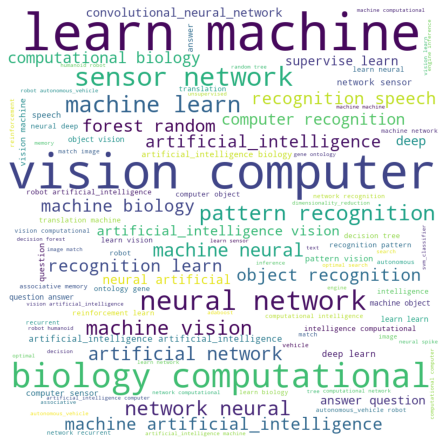

In [77]:
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig("wordcloud.png", dpi=500)
plt.show()

In [80]:
plt.show()
plt.savefig("wordcloud.png")

<Figure size 432x288 with 0 Axes>

#### Save classified dataframe

In [86]:
df_classified.to_csv("~/git/dspg21RnD/data/dspg21RnD/nterm_matched_abstracts.csv", index=False)